# Poverty_Probability_Index

### The data includes the Poverty Probability Index (PPI), which estimates an individual's poverty status using 10 questions about a household’s characteristics and asset ownership, and other socioeconomic indicators which come from the Financial Inclusion Insights household surveys conducted by InterMedia.

## Problem statement: 
### The aim is to predict the probability that individuals across seven different countries live below the poverty line

## Hypothesis :
### 1- An individual with lower education level have a high probability to be in poverty
### 2- An individual who is married have a lower probability to be in poverty
### 3- Individuals in urban area have a lower probability to be in poverty

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 7, 3

#### Load datasets

In [3]:
#Loading datasets
train = pd.read_csv('train_values.csv')
test = pd.read_csv('test_values.csv')

#### Combine datasets

In [4]:
#combine dataset

train['source'] = 'train'
test['source'] = 'test'

pov = pd.concat([train, test], ignore_index = True, sort=True)
print(train.shape, test.shape, pov.shape)

(12600, 61) (8400, 60) (21000, 61)


## Data exploration

In [5]:
pov.head(5)

,active_bank_user,active_formal_nbfi_user,active_informal_nbfi_user,active_mm_user,advanced_phone_use,age,avg_shock_strength_last_year,bank_interest_rate,borrowed_for_daily_expenses_last_year,borrowed_for_emergency_last_year,...,phone_technology,poverty_probability,reg_bank_acct,reg_formal_nbfi_account,reg_mm_acct,relationship_to_hh_head,religion,row_id,share_hh_income_provided,source
0,True,False,False,False,False,18.0,0.0,NaN,False,False,...,0,0.515,True,False,False,Other,P,0,1.0,train
1,True,False,False,False,False,30.0,0.0,NaN,False,False,...,1,0.981,True,False,False,Other,P,1,NaN,train
2,False,False,False,False,False,20.0,0.0,NaN,False,False,...,1,0.982,False,False,False,Spouse,Q,2,1.0,train
3,False,False,False,False,False,61.0,0.0,NaN,False,False,...,0,0.879,False,False,False,Head,Q,3,NaN,train
4,False,False,False,False,False,26.0,0.0,NaN,False,False,...,0,0.796,False,False,False,Spouse,X,4,2.0,train


In [6]:
pov.columns

Index(['active_bank_user', 'active_formal_nbfi_user',
       'active_informal_nbfi_user', 'active_mm_user', 'advanced_phone_use',
       'age', 'avg_shock_strength_last_year', 'bank_interest_rate',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_emergency_last_year',
       'borrowed_for_home_or_biz_last_year', 'borrowing_recency', 'can_add',
       'can_calc_compounding', 'can_calc_percents', 'can_call', 'can_divide',
       'can_make_transaction', 'can_text', 'can_use_internet',
       'cash_property_savings', 'country', 'education_level',
       'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'female', 'financially_included',
       'formal_savings', 'has_insurance', 'has_investment',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'informal_

In [7]:
pov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 61 columns):
active_bank_user                         21000 non-null bool
active_formal_nbfi_user                  21000 non-null bool
active_informal_nbfi_user                21000 non-null bool
active_mm_user                           21000 non-null bool
advanced_phone_use                       21000 non-null bool
age                                      21000 non-null float64
avg_shock_strength_last_year             21000 non-null float64
bank_interest_rate                       511 non-null float64
borrowed_for_daily_expenses_last_year    21000 non-null bool
borrowed_for_emergency_last_year         21000 non-null bool
borrowed_for_home_or_biz_last_year       21000 non-null bool
borrowing_recency                        21000 non-null int64
can_add                                  21000 non-null bool
can_calc_compounding                     21000 non-null bool
can_calc_percents            

In [8]:
pov.isnull().sum()

active_bank_user               0
active_formal_nbfi_user        0
active_informal_nbfi_user      0
active_mm_user                 0
advanced_phone_use             0
                            ... 
relationship_to_hh_head        0
religion                       0
row_id                         0
share_hh_income_provided     498
source                         0
Length: 61, dtype: int64

In [9]:
pov.describe()

,age,avg_shock_strength_last_year,bank_interest_rate,borrowing_recency,education_level,mfi_interest_rate,mm_interest_rate,num_financial_activities_last_year,num_formal_institutions_last_year,num_informal_institutions_last_year,num_shocks_last_year,num_times_borrowed_last_year,other_fsp_interest_rate,phone_ownership,phone_technology,poverty_probability,row_id,share_hh_income_provided
count,21000.000000,21000.000000,511.000000,21000.000000,20615.000000,299.000000,245.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,409.000000,21000.000000,21000.000000,12600.000000,21000.000000,20502.000000
mean,36.369095,2.100225,9.712622,0.864524,1.317536,11.352007,9.131327,1.554143,0.717476,0.186714,1.090619,0.656905,8.461614,1.467286,1.207333,0.611272,5459.500000,2.885231
std,15.211887,2.019062,13.128242,0.960617,0.907730,10.350488,11.694569,2.035922,0.801826,0.468895,1.191237,0.924633,11.221073,0.776504,1.092757,0.291476,3368.818835,1.560339
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,0.000000,2.000000,0.000000,1.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,1.000000,0.000000,0.394000,2624.750000,1.000000
50%,33.000000,2.000000,8.000000,0.000000,1.000000,10.000000,7.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,2.000000,1.000000,0.633000,5249.500000,2.000000
75%,45.000000,4.000000,14.000000,2.000000,2.000000,15.000000,10.000000,3.000000,1.000000,0.000000,2.000000,1.000000,10.000000,2.000000,2.000000,0.879000,7874.250000,5.000000
max,117.000000,5.000000,100.000000,2.000000,3.000000,100.000000,100.000000,10.000000,6.000000,4.000000,5.000000,3.000000,100.000000,2.000000,3.000000,1.000000,12599.000000,5.000000


### Univariate analysis

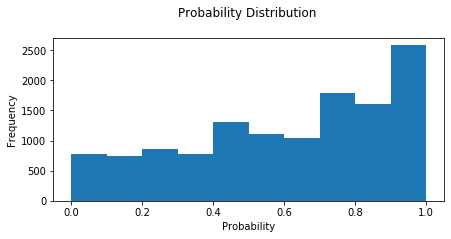

In [10]:
plt.hist(train['poverty_probability'])
plt.title('Probability Distribution \n')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

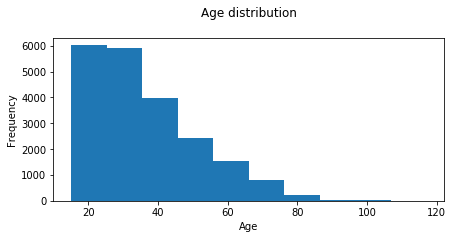

In [11]:
#univariate analysis on age
plt.hist(pov.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution\n')
plt.show()

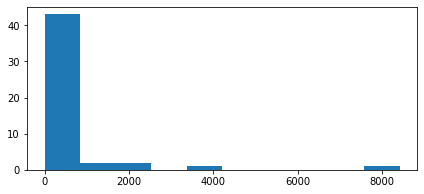

In [12]:
plt.hist(pov['avg_shock_strength_last_year'].value_counts(), bins = 10)
plt.show()

In [13]:
#Education level frequency
education = pov['education_level'].value_counts()
print(education)

1.0    7497
2.0    6859
0.0    4277
3.0    1982
Name: education_level, dtype: int64


In [14]:
#Education level frequency
education_pct = round(pov['education_level'].value_counts()/sum(education)*100)
print(education_pct)

1.0    36.0
2.0    33.0
0.0    21.0
3.0    10.0
Name: education_level, dtype: float64


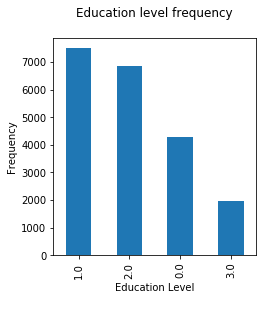

In [15]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Education Level\n')
ax1.set_ylabel('Frequency')
ax1.set_title("Education level frequency\n")
education.plot(kind='bar')
plt.show()

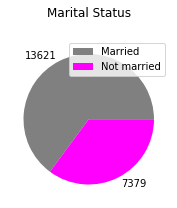

In [16]:
married = pov['married'].value_counts()
married_value = ['Married', 'Not married']
plt.pie(married, labels = married, colors = ['gray', 'magenta'])
plt.title('Marital Status\n')
plt.legend(married_value, loc='best')
plt.show()

In [17]:
married = pov['married'].value_counts()
print(married)

True     13621
False     7379
Name: married, dtype: int64


In [18]:
married_pct = round(pov['married'].value_counts() / sum(married) * 100)
print(married_pct)

True     65.0
False    35.0
Name: married, dtype: float64


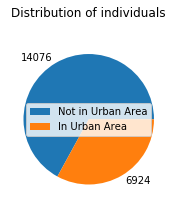

In [19]:
urban_area = pov['is_urban'].value_counts()
urban_value = ['Not in Urban Area', 'In Urban Area']
plt.pie(urban_area, labels = urban_area)
plt.title('Distribution of individuals\n')
plt.legend(urban_value, loc='center')
plt.show()

In [20]:
pov['is_urban'].value_counts()

False    14076
True      6924
Name: is_urban, dtype: int64

In [21]:
urban_area_pct = round(pov['is_urban'].value_counts() / sum(urban_area) * 100)
print(urban_area_pct)

False    67.0
True     33.0
Name: is_urban, dtype: float64


In [22]:
gender = pov['female'].value_counts()
print(gender)

True     11670
False     9330
Name: female, dtype: int64


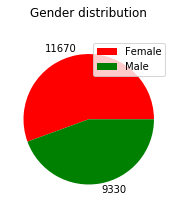

In [23]:
gender = pov['female'].value_counts()
gender_value = ['Female', 'Male']
plt.pie(gender, labels = gender, colors = ['red', 'green'])
plt.title('Gender distribution\n')
plt.legend(gender_value, loc='best')
plt.show()

In [24]:
gender_pct = round(pov['female'].value_counts() / sum(gender) * 100)
print(gender_pct)

True     56.0
False    44.0
Name: female, dtype: float64


In [25]:
bank_user = pov['active_bank_user'].value_counts()
print(bank_user)

False    16688
True      4312
Name: active_bank_user, dtype: int64


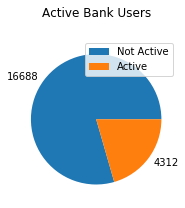

In [26]:
bank_value = ['Not Active', 'Active']
plt.pie(bank_user, labels = bank_user)
plt.title('Active Bank Users\n')
plt.legend(bank_value, loc='best')
plt.show()

In [27]:
emp_cat = pov['employment_category_last_year'].unique()
print(emp_cat)

['housewife_or_student' 'employed' 'other' 'unemployed'
 'retired_or_disabled']


In [28]:
emp_cat = pov['employment_category_last_year'].value_counts()
print(emp_cat)

employed                12363
housewife_or_student     6124
other                    1105
unemployed                719
retired_or_disabled       689
Name: employment_category_last_year, dtype: int64


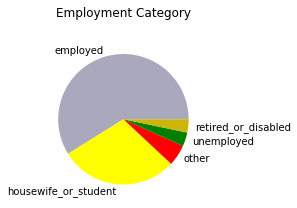

In [29]:
emp_cat = pov['employment_category_last_year'].value_counts()
plt.pie(emp_cat, labels = emp_cat.index, colors = ['#A9A8BC', 'yellow', 'red', 'green', '#CCB608'])
plt.title('Employment Category\n')
#plt.legend(emp_cat.index, loc='top_right')
plt.show()

In [30]:
emp_cat = pov['employment_category_last_year'].value_counts()
print(emp_cat)

employed                12363
housewife_or_student     6124
other                    1105
unemployed                719
retired_or_disabled       689
Name: employment_category_last_year, dtype: int64


In [31]:
emp_cat_pct = round(pov['employment_category_last_year'].value_counts() / sum(emp_cat) * 100)
print(emp_cat_pct)

employed                59.0
housewife_or_student    29.0
other                    5.0
unemployed               3.0
retired_or_disabled      3.0
Name: employment_category_last_year, dtype: float64


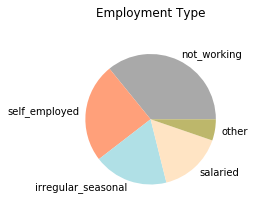

In [32]:
emp_type = pov['employment_type_last_year'].value_counts()
plt.pie(emp_type, labels = emp_type.index, colors = ['#A9A9A9', '#FFA07A', '#B0E0E6', '#FFE4C4', '#BDB76B'])
plt.title('Employment Type\n')
#plt.legend(emp_type.index, loc='best')
plt.show()

In [33]:
emp_type = pov['employment_type_last_year'].value_counts()
print(emp_type)

not_working           7532
self_employed         5164
irregular_seasonal    3872
salaried              3327
other                 1105
Name: employment_type_last_year, dtype: int64


In [34]:
emp_type_pct = round(pov['employment_type_last_year'].value_counts()/sum(emp_type)*100)
print(emp_type_pct)

not_working           36.0
self_employed         25.0
irregular_seasonal    18.0
salaried              16.0
other                  5.0
Name: employment_type_last_year, dtype: float64


### Bivariate analysis

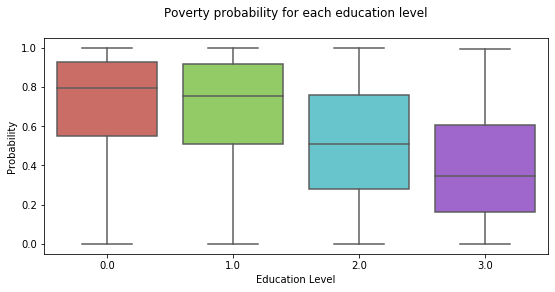

In [35]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

sns.boxplot(x='education_level', y='poverty_probability', data=pov, palette='hls')
ax.set_xticks(range(4))

#ax.set_xticklabels(education_value, rotation=30, fontsize='medium')
ax.set_title('Poverty probability for each education level\n')

ax.set_xlabel('Education Level')
ax.set_ylabel('Probability')

#ax.legend(gender_value, loc='best') 
plt.show()

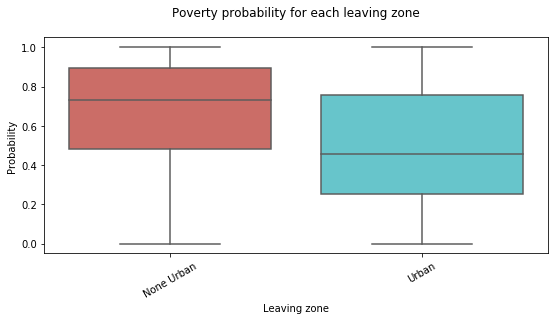

In [36]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

sns.boxplot(x='is_urban', y='poverty_probability', data=pov, palette='hls')
ax.set_xticks(range(2))

ax.set_xticklabels(['None Urban', 'Urban'], rotation=30, fontsize='medium')
ax.set_title('Poverty probability for each leaving zone\n')

ax.set_xlabel('Leaving zone')
ax.set_ylabel('Probability')

#ax.legend(gender_value, loc='best') 
plt.show()

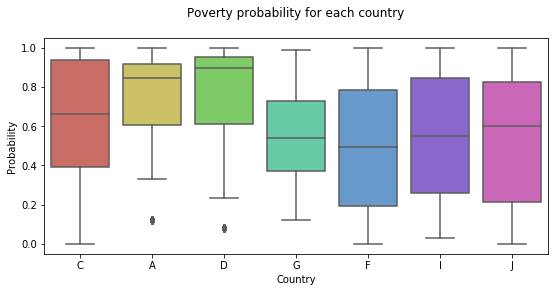

In [37]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

sns.boxplot(x='country', y='poverty_probability', data=pov, palette='hls')
ax.set_xticks(range(7))

#ax.set_xticklabels(['None Urban', 'Urban'], rotation=30, fontsize='medium')
ax.set_title('Poverty probability for each country\n')

ax.set_xlabel('Country')
ax.set_ylabel('Probability')

#ax.legend(gender_value, loc='best') 
plt.show()

In [38]:
gender_status = pd.crosstab(pov['married'], pov['female'])
print(gender_status)

female   False  True 
married              
False     3347   4032
True      5983   7638


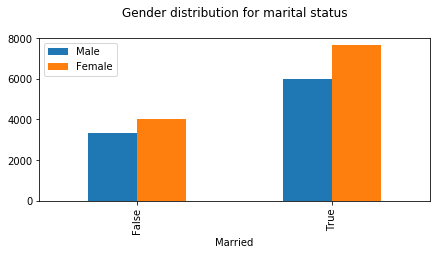

In [39]:
gender_status.plot(kind='bar')
plt.legend(['Male', 'Female'], loc='best')
plt.xlabel('Married')
plt.title('Gender distribution for marital status\n')
plt.show()

##### Note that there are more female that are married and not married than male

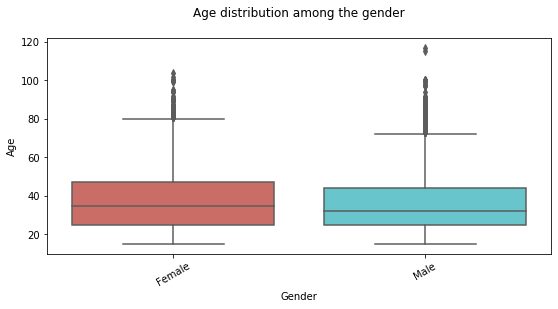

In [40]:
#Boxplot age vs gender
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

sns.boxplot(x='female', y='age', data=pov, palette='hls')
ax.set_xticks(range(2))

ax.set_xticklabels(gender_value, rotation=30, fontsize='medium')
ax.set_title('Age distribution among the gender\n')

ax.set_xlabel('Gender')
ax.set_ylabel('Age')

#ax.legend(gender_value, loc='best') 
plt.show()

##### Average age is almost same for both female and male; Note that we have more outliers in male group

In [41]:
gender_bank = pd.crosstab(pov['female'], pov['active_bank_user'])
print(gender_bank)

active_bank_user  False  True 
female                        
False              6862   2468
True               9826   1844


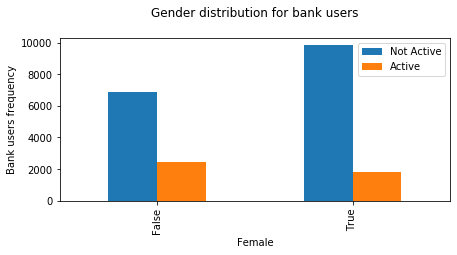

In [42]:
gender_bank.plot(kind='bar')
plt.legend(['Not Active', 'Active'], loc='best')
plt.xlabel('Female')
plt.ylabel('Bank users frequency')
plt.title('Gender distribution for bank users\n')
plt.show()

##### Note that male are more actively using bank than female. But overall, the respondents are not actively using bank.

In [43]:
edu_gender = round(pd.crosstab(pov['education_level'],pov['female'],normalize='index')*100)
print(edu_gender)

female           False  True 
education_level              
0.0               34.0   66.0
1.0               42.0   58.0
2.0               49.0   51.0
3.0               61.0   39.0


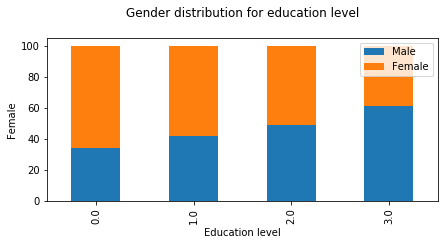

In [44]:
edu_gender.plot(kind='bar', stacked = True)
plt.legend(['Male', 'Female'], loc='best')
plt.xlabel('Education level')
plt.ylabel('Female')
plt.title('Gender distribution for education level\n')
plt.show()

##### The main education level in female group is level 1 and in male group it is level 2. Level 3 education has more male

In [45]:
edu_urban = round(pd.crosstab(pov['education_level'],pov['is_urban'],normalize='index') * 100)
print(edu_urban)

is_urban         False  True 
education_level              
0.0               79.0   21.0
1.0               73.0   27.0
2.0               59.0   41.0
3.0               43.0   57.0


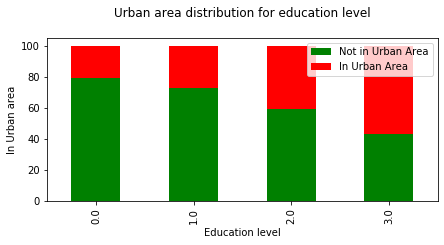

In [46]:
edu_urban.plot(kind='bar', stacked = True, color = ["green", 'red'])
plt.legend(urban_value,loc='best')
plt.xlabel('Education level')
plt.ylabel('In Urban area')
plt.title('Urban area distribution for education level\n')
plt.show()

#### People leaving in urban area are more educated. Most of them have level 2 or 3 and in none urban area the predominant levels are 0 and 1

In [47]:
emp_gender = pd.crosstab(pov['female'],pov['employment_type_last_year'],normalize='index')
print(emp_gender)

employment_type_last_year  irregular_seasonal  not_working    other  salaried  \
female                                                                          
False                                0.225616     0.186602  0.05552  0.241586   
True                                 0.151414     0.496230  0.05030  0.091945   

employment_type_last_year  self_employed  
female                                    
False                           0.290675  
True                            0.210111  


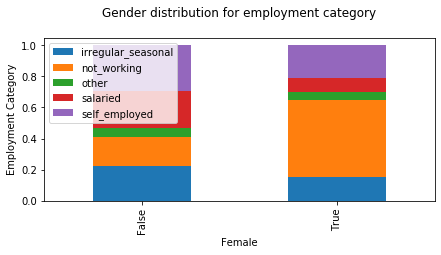

In [48]:
emp_gender.plot(kind='bar', stacked = True)
plt.legend(loc='best')
plt.xlabel('Female')
plt.ylabel('Employment Category')
plt.title('Gender distribution for employment category\n')
plt.show()

In [49]:
emp_urban = round(pd.crosstab(pov['employment_category_last_year'],pov['is_urban'],normalize='index')*100)
print(emp_urban)

is_urban                       False  True 
employment_category_last_year              
employed                        68.0   32.0
housewife_or_student            66.0   34.0
other                           71.0   29.0
retired_or_disabled             67.0   33.0
unemployed                      59.0   41.0


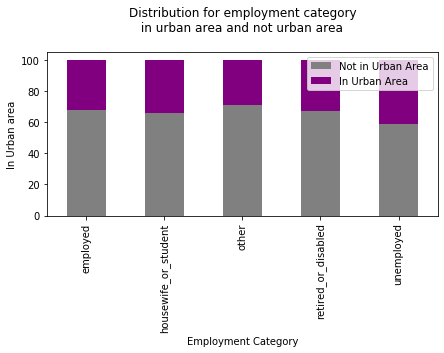

In [50]:
emp_urban.plot(kind='bar', stacked = True, color = ['gray', 'purple'])
plt.legend(urban_value, loc='best')
plt.xlabel('Employment Category')
plt.ylabel('In Urban area')
plt.title('Distribution for employment category\n in urban area and not urban area \n')
plt.show()

In [51]:
edu_level = [0, 1, 2, 3]

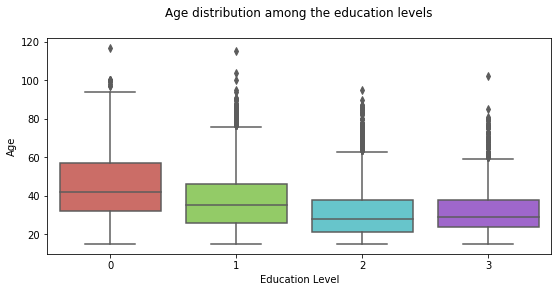

In [52]:
#Boxplot age vs gender
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

sns.boxplot(x='education_level', y='age', data=pov, palette='hls')
ax.set_xticks(range(4))

ax.set_xticklabels(edu_level, fontsize='medium')
ax.set_title('Age distribution among the education levels\n')

ax.set_xlabel('Education Level')
ax.set_ylabel('Age')

#ax.legend(gender_value, loc='best') 
plt.show()

#### Note that people with higher education level are younger.

#### Heatmap

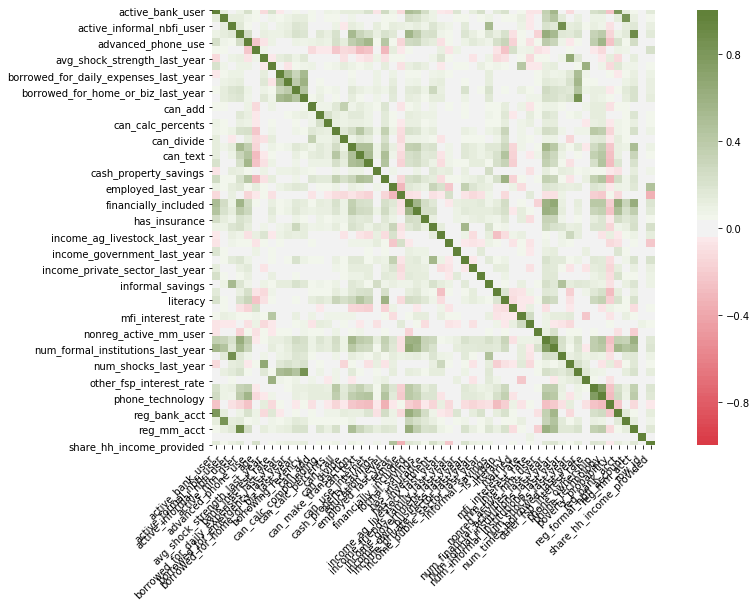

In [53]:
corr = pov.corr()
plt.figure(figsize=(15,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 110, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

## Data cleaning

In [54]:
#filter categorical variables
categorical_columns = [x for x in pov.dtypes.index if pov.dtypes[x] == 'bool']
#exclude ID cols and source
#categorical_columns = [x for x in categorical_columns
 #                     if x not in ['Item_Identifer', 'Outlet_Identifier', 'source']]
#print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(pov[col].value_counts())


Frequency of Categories for variable active_bank_user
False    16688
True      4312
Name: active_bank_user, dtype: int64

Frequency of Categories for variable active_formal_nbfi_user
False    19816
True      1184
Name: active_formal_nbfi_user, dtype: int64

Frequency of Categories for variable active_informal_nbfi_user
False    17983
True      3017
Name: active_informal_nbfi_user, dtype: int64

Frequency of Categories for variable active_mm_user
False    15963
True      5037
Name: active_mm_user, dtype: int64

Frequency of Categories for variable advanced_phone_use
False    14776
True      6224
Name: advanced_phone_use, dtype: int64

Frequency of Categories for variable borrowed_for_daily_expenses_last_year
False    17219
True      3781
Name: borrowed_for_daily_expenses_last_year, dtype: int64

Frequency of Categories for variable borrowed_for_emergency_last_year
False    16511
True      4489
Name: borrowed_for_emergency_last_year, dtype: int64

Frequency of Categories for variable bo

In [55]:
#find null values
for col in pov.columns:
    print("no. of cells in column", col, "with null values:", pov[col].isnull().sum())

no. of cells in column active_bank_user with null values: 0
no. of cells in column active_formal_nbfi_user with null values: 0
no. of cells in column active_informal_nbfi_user with null values: 0
no. of cells in column active_mm_user with null values: 0
no. of cells in column advanced_phone_use with null values: 0
no. of cells in column age with null values: 0
no. of cells in column avg_shock_strength_last_year with null values: 0
no. of cells in column bank_interest_rate with null values: 20489
no. of cells in column borrowed_for_daily_expenses_last_year with null values: 0
no. of cells in column borrowed_for_emergency_last_year with null values: 0
no. of cells in column borrowed_for_home_or_biz_last_year with null values: 0
no. of cells in column borrowing_recency with null values: 0
no. of cells in column can_add with null values: 0
no. of cells in column can_calc_compounding with null values: 0
no. of cells in column can_calc_percents with null values: 0
no. of cells in column can_

In [56]:
for columns in pov.columns:
    if pov[columns].isnull().sum()>0:
        missing_col = round(pov[columns].isnull().sum() / pov.row_id.count() * 100, 2)
        print('Missing value percentage in column', columns, ': ', missing_col, "%")
    

Missing value percentage in column bank_interest_rate :  97.57 %
Missing value percentage in column education_level :  1.83 %
Missing value percentage in column mfi_interest_rate :  98.58 %
Missing value percentage in column mm_interest_rate :  98.83 %
Missing value percentage in column other_fsp_interest_rate :  98.05 %
Missing value percentage in column poverty_probability :  40.0 %
Missing value percentage in column share_hh_income_provided :  2.37 %


##### Based on the result above we will drop following columns : bank_interest_rate, mfi_interest_rate, mm_interest_rate, other_fsp_interest_rate because more than 95% of values are missing.
##### Moreover we will drop rows with missing values in following columns because less than 3% are missing : education_level, share_hh_income_provided.

In [57]:
#drop columns
pov = pov.drop(['bank_interest_rate', 'mfi_interest_rate', 'mm_interest_rate', 'other_fsp_interest_rate'], axis=1)

##### Droping rows with null values

In [58]:
pov = pov[pd.notnull(pov['education_level'])]

In [59]:
pov = pov[pd.notnull(pov['share_hh_income_provided'])]

In [60]:
pov.shape

(20127, 57)

In [61]:
#check for any duplicated rows
pov.duplicated().sum()

0

#### Outliers treatment on age

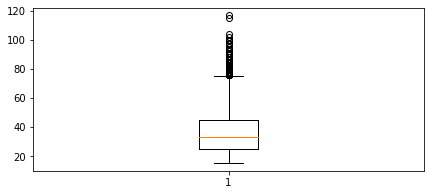

In [62]:
plt.boxplot(pov['age'])
plt.show()

In [63]:
Q1 = pov.age.quantile(0.25)
Q3 = pov.age.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

20.0


In [64]:
print(pov['age'].quantile(0.10))
print(pov['age'].quantile(0.75) + 1.5*IQR)

19.0
75.0


In [65]:
#pov['age'] = np.where(pov['age'] <2960.0, 2960.0,pov['age'])
pov['age'] = np.where(pov['age'] >75, 75,pov['age'])
print(pov['age'].skew())

0.7666085997960168


In [66]:
pov['age'].describe()

count    20127.000000
mean        36.264173
std         14.785274
min         15.000000
25%         25.000000
50%         33.000000
75%         45.000000
max         75.000000
Name: age, dtype: float64

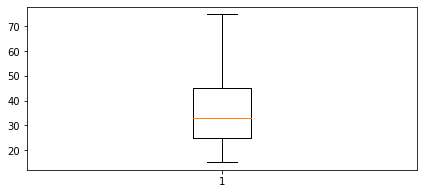

In [67]:
plt.boxplot(pov['age'])
plt.show()

In [68]:
pov_1 = pov

In [69]:
var_type = pov_1.dtypes.value_counts()
print('Variables type : \n')
print(var_type)

Variables type : 

bool       37
int64       9
object      6
float64     5
dtype: int64


In [70]:
pov_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20127 entries, 0 to 20999
Data columns (total 57 columns):
active_bank_user                         20127 non-null bool
active_formal_nbfi_user                  20127 non-null bool
active_informal_nbfi_user                20127 non-null bool
active_mm_user                           20127 non-null bool
advanced_phone_use                       20127 non-null bool
age                                      20127 non-null float64
avg_shock_strength_last_year             20127 non-null float64
borrowed_for_daily_expenses_last_year    20127 non-null bool
borrowed_for_emergency_last_year         20127 non-null bool
borrowed_for_home_or_biz_last_year       20127 non-null bool
borrowing_recency                        20127 non-null int64
can_add                                  20127 non-null bool
can_calc_compounding                     20127 non-null bool
can_calc_percents                        20127 non-null bool
can_call                      

## Feature Engineering

In [71]:
#filter boolean variables
bool_columns = [x for x in pov.dtypes.index if pov_1.dtypes[x] == 'bool']

In [72]:
#Label encoding for boolean variables
for col in bool_columns:
    pov_1[col] = pov_1[col].map({True:1,
                             False:0})

In [73]:
#filter categorical variables
cat_columns = [x for x in pov_1.dtypes.index if pov_1.dtypes[x] == 'object']

In [74]:
#Label encoding for boolean variables
from sklearn import preprocessing 
for col in cat_columns:
    label_enc = preprocessing.LabelEncoder() 
    pov_1[col]= label_enc.fit_transform(pov_1[col])


In [75]:
cat_columns

['country',
 'employment_category_last_year',
 'employment_type_last_year',
 'relationship_to_hh_head',
 'religion',
 'source']

In [76]:
for cols in cat_columns:
    print('\nFrequency of Categories for variable %s'%cols)
    print(pov_1[cols].value_counts())


Frequency of Categories for variable country
4    2975
6    2962
2    2943
5    2934
0    2871
1    2865
3    2577
Name: country, dtype: int64

Frequency of Categories for variable employment_category_last_year
0    11949
1     5818
2     1032
4      678
3      650
Name: employment_category_last_year, dtype: int64

Frequency of Categories for variable employment_type_last_year
1    7146
4    4951
0    3763
3    3235
2    1032
Name: employment_type_last_year, dtype: int64

Frequency of Categories for variable relationship_to_hh_head
1    8456
5    6592
4    3456
0     635
2     518
3     443
6      27
Name: relationship_to_hh_head, dtype: int64

Frequency of Categories for variable religion
3    8590
4    8587
2    2726
1     142
0      82
Name: religion, dtype: int64

Frequency of Categories for variable source
1    12068
0     8059
Name: source, dtype: int64


In [77]:
pov_1.head()

,active_bank_user,active_formal_nbfi_user,active_informal_nbfi_user,active_mm_user,advanced_phone_use,age,avg_shock_strength_last_year,borrowed_for_daily_expenses_last_year,borrowed_for_emergency_last_year,borrowed_for_home_or_biz_last_year,...,phone_technology,poverty_probability,reg_bank_acct,reg_formal_nbfi_account,reg_mm_acct,relationship_to_hh_head,religion,row_id,share_hh_income_provided,source
0,1,0,0,0,0,18.0,0.0,0,0,0,...,0,0.515,1,0,0,2,2,0,1.0,1
2,0,0,0,0,0,20.0,0.0,0,0,0,...,1,0.982,0,0,0,5,3,2,1.0,1
4,0,0,0,0,0,26.0,0.0,0,0,0,...,0,0.796,0,0,0,5,4,4,2.0,1
5,0,1,0,0,0,36.0,4.0,1,1,0,...,0,0.915,0,1,0,5,3,5,1.0,1
6,1,0,0,0,0,35.0,0.0,0,0,0,...,0,0.447,1,0,0,1,2,6,5.0,1


In [78]:
var_type = pov_1.dtypes.value_counts()
print('Variables type : \n')
print(var_type)

Variables type : 

int64      46
int32       6
float64     5
dtype: int64


In [79]:
pov_1.shape

(20127, 57)

In [80]:
pov_1['source'].value_counts()

1    12068
0     8059
Name: source, dtype: int64

In [81]:
pov_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20127 entries, 0 to 20999
Data columns (total 57 columns):
active_bank_user                         20127 non-null int64
active_formal_nbfi_user                  20127 non-null int64
active_informal_nbfi_user                20127 non-null int64
active_mm_user                           20127 non-null int64
advanced_phone_use                       20127 non-null int64
age                                      20127 non-null float64
avg_shock_strength_last_year             20127 non-null float64
borrowed_for_daily_expenses_last_year    20127 non-null int64
borrowed_for_emergency_last_year         20127 non-null int64
borrowed_for_home_or_biz_last_year       20127 non-null int64
borrowing_recency                        20127 non-null int64
can_add                                  20127 non-null int64
can_calc_compounding                     20127 non-null int64
can_calc_percents                        20127 non-null int64
can_call           

## Model Building

#### Separating the train data from the predict data

In [82]:
train_data = pov_1.loc[pov_1['source']==1, ]

In [83]:
train_data.shape

(12068, 57)

In [84]:
predict_data = pov_1.loc[pov_1['source']==0, ]

In [85]:
predict_data.shape

(8059, 57)

In [86]:
# Extract independent and dependent variables

X = train_data.drop(["poverty_probability"], axis=1)
y = train_data.loc[:, 'poverty_probability']
print(X.shape)
print(y.shape)

(12068, 56)
(12068,)


In [87]:
X.head()

,active_bank_user,active_formal_nbfi_user,active_informal_nbfi_user,active_mm_user,advanced_phone_use,age,avg_shock_strength_last_year,borrowed_for_daily_expenses_last_year,borrowed_for_emergency_last_year,borrowed_for_home_or_biz_last_year,...,phone_ownership,phone_technology,reg_bank_acct,reg_formal_nbfi_account,reg_mm_acct,relationship_to_hh_head,religion,row_id,share_hh_income_provided,source
0,1,0,0,0,0,18.0,0.0,0,0,0,...,1,0,1,0,0,2,2,0,1.0,1
2,0,0,0,0,0,20.0,0.0,0,0,0,...,2,1,0,0,0,5,3,2,1.0,1
4,0,0,0,0,0,26.0,0.0,0,0,0,...,1,0,0,0,0,5,4,4,2.0,1
5,0,1,0,0,0,36.0,4.0,1,1,0,...,1,0,0,1,0,5,3,5,1.0,1
6,1,0,0,0,0,35.0,0.0,0,0,0,...,1,0,1,0,0,1,2,6,5.0,1


In [88]:
# loading packages
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
#splitting data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [90]:
#Scale the data
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

In [91]:
#Ordinary Least Square regression
import statsmodels.api as sm
y_train = np.array(y_train)
X2_train = sm.add_constant(X_train_scaled)
X2_test = sm.add_constant(X_test_scaled)
ols = sm.OLS(y_train,X_train_scaled)
lr = ols.fit()
print(lr.summary())

C:\Users\Acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              10.99
Date:                Sat, 30 May 2020   Prob (F-statistic):                    5.62e-90
Time:                        01:19:22   Log-Likelihood:                         -9003.3
No. Observations:                9051   AIC:                                  1.812e+04
Df Residuals:                    8996   BIC:                                  1.851e+04
Df Model:                          55                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [92]:
X2_train = X2_train.drop(['active_bank_user', 'active_formal_nbfi_user', 'active_informal_nbfi_user', 'active_mm_user', 
                          'advanced_phone_use', 'avg_shock_strength_last_year', 'borrowed_for_daily_expenses_last_year',
                          'borrowed_for_emergency_last_year', 'borrowed_for_home_or_biz_last_year', 'borrowing_recency', 
                          'can_add', 'can_calc_compounding', 'can_calc_percents', 'can_call', 'can_divide', 'can_make_transaction', 
                          'can_text', 'can_use_internet', 'cash_property_savings', 'employed_last_year', 'employment_category_last_year',
                          'employment_type_last_year', 'female', 'financially_included', 'formal_savings', 'has_insurance', 
                          'income_ag_livestock_last_year', 'income_government_last_year', 'income_own_business_last_year',
                          'income_private_sector_last_year', 'income_public_sector_last_year', 'informal_savings', 'literacy',
                          'nonreg_active_mm_user', 'num_financial_activities_last_year', 'num_formal_institutions_last_year', 
                          'num_informal_institutions_last_year', 'num_times_borrowed_last_year', 'phone_technology', 
                          'reg_bank_acct', 'reg_formal_nbfi_account', 'relationship_to_hh_head', 'religion', 'row_id', 
                          'share_hh_income_provided', 'source'], axis=1)

In [93]:
X2_test = X2_test.drop(['active_bank_user', 'active_formal_nbfi_user', 'active_informal_nbfi_user', 'active_mm_user', 
                          'advanced_phone_use', 'avg_shock_strength_last_year', 'borrowed_for_daily_expenses_last_year',
                          'borrowed_for_emergency_last_year', 'borrowed_for_home_or_biz_last_year', 'borrowing_recency', 
                          'can_add', 'can_calc_compounding', 'can_calc_percents', 'can_call', 'can_divide', 'can_make_transaction', 
                          'can_text', 'can_use_internet', 'cash_property_savings', 'employed_last_year', 'employment_category_last_year',
                          'employment_type_last_year', 'female', 'financially_included', 'formal_savings', 'has_insurance', 
                          'income_ag_livestock_last_year', 'income_government_last_year', 'income_own_business_last_year',
                          'income_private_sector_last_year', 'income_public_sector_last_year', 'informal_savings', 'literacy',
                          'nonreg_active_mm_user', 'num_financial_activities_last_year', 'num_formal_institutions_last_year', 
                          'num_informal_institutions_last_year', 'num_times_borrowed_last_year', 'phone_technology', 
                          'reg_bank_acct', 'reg_formal_nbfi_account', 'relationship_to_hh_head', 'religion', 'row_id', 
                          'share_hh_income_provided', 'source'], axis=1)

In [94]:
#Ordinary Least Square regression
y_train = np.array(y_train)
X2_train = sm.add_constant(X2_train)
X2_test = sm.add_constant(X2_test)
ols = sm.OLS(y_train,X2_train)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     369.3
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        01:19:22   Log-Likelihood:                -115.38
No. Observations:                9051   AIC:                             252.8
Df Residuals:                    9040   BIC:                             331.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

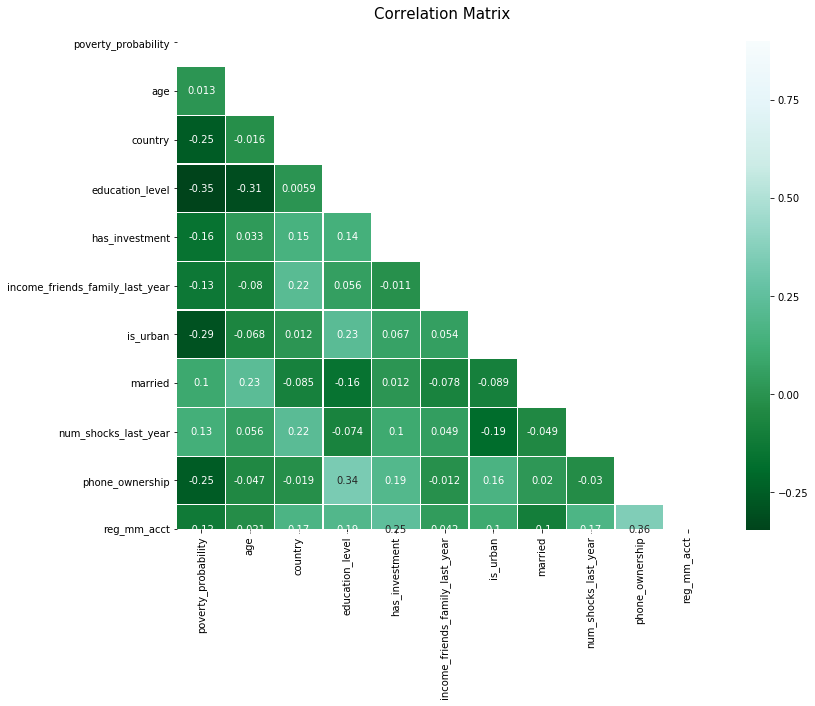

In [95]:
features = ['poverty_probability','age','country','education_level','has_investment','income_friends_family_last_year',
            'is_urban','married','num_shocks_last_year','phone_ownership','reg_mm_acct']

mask = np.zeros_like(pov_1[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(12, 10))
ax.set_xticklabels(features)

plt.title('Correlation Matrix \n',fontsize=15)

sns.heatmap(pov_1[features].corr(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn_r", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": .9})

plt.show()

In [96]:
X2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9051 entries, 0 to 9050
Data columns (total 11 columns):
const                              9051 non-null float64
age                                9051 non-null float64
country                            9051 non-null float64
education_level                    9051 non-null float64
has_investment                     9051 non-null float64
income_friends_family_last_year    9051 non-null float64
is_urban                           9051 non-null float64
married                            9051 non-null float64
num_shocks_last_year               9051 non-null float64
phone_ownership                    9051 non-null float64
reg_mm_acct                        9051 non-null float64
dtypes: float64(11)
memory usage: 777.9 KB


In [97]:
#remove variables which have no correlation with the target
#while lr.pvalues.max()>0.05:
 #   X2_train=np.delete(X2_train,lr.pvalues.argmax(),axis=1)
  #  X2_test=np.delete(X2_test,lr.pvalues.argmax(),axis=1)
   # ols = sm.OLS(y_train,X2_train)
    #lr = ols.fit()
#print(lr.summary())

### Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#train model
lr.fit(X2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
y_pred = lr.predict(X2_test)
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.         -0.03545614 -0.07624091 -0.07915945 -0.0185895  -0.02069515
 -0.05164446  0.01738353  0.04364004 -0.04210274  0.00978413]
Mean squared error: 0.06
Coefficient of determination: 0.27


In [100]:
y_pred_test = lr.predict(X2_test)
y_pred_train = lr.predict(X2_train)

In [101]:
train_lr_rmse = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
test_lr_rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2_lr_score = r2_score(y_test, y_pred)

print('R2_score:', r2_lr_score)
print('Train set RMSE:',train_lr_rmse)
print('Test set RMSE:', test_lr_rmse)

R2_score: 0.2719293933827528
Train set RMSE: 0.24507510635268973
Test set RMSE: 0.24952126471498995


#### Linear regression shows an R2 of 0.28 and RMSE of 0.24

### KNN analysis

In [102]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_neighbors': range(1,10), 'p': range(1,10)}]
knn = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=4)
knn.fit(X_train, y_train)
print("Best number of neighbors found {}:".format(knn.best_params_))


Best number of neighbors found {'n_neighbors': 9, 'p': 1}:


In [103]:
#will use K = 9 and p = 1
knn = KNeighborsRegressor(n_neighbors=9, p = 1)
knn.fit(X_train_scaled, y_train)
y_predknn = knn.predict(X_test_scaled)

test_knn_rmse = (np.sqrt(mean_squared_error(y_test, y_predknn)))
test_knn_r2 = r2_score(y_test, y_predknn)
#adjr2_knn = 1 - (1-test_knn_r2)*((len(X2_test) - 1)/(len(X2_test) - len(X2_test[0])))
print(test_knn_rmse, test_knn_r2)

0.24947113211513489 0.2722219248086485


#### KNN analysis shows an R2 of 0.30 and RMSE of 0.24 which is a little bit better than Linear regression

### Random Forest analysis

In [105]:
from sklearn.ensemble import RandomForestRegressor
tuned_parameters = [{'n_estimators': range(10,110,10),
                     'max_depth': range(1,11),
                     'min_impurity_decrease': range(0,10),
                     'random_state': range(0,60,10)}]
rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
rf.fit(X2_train, y_train)
print("Best estimators found {}:".format(rf.best_params_))

KeyboardInterrupt: 

In [117]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=8, min_impurity_decrease=0, random_state=20)
rf.fit(X2_train, y_train)
rf.score(X2_test, y_test)

y_predrf = rf.predict(X2_test)

test_rf_rmse = (np.sqrt(mean_squared_error(y_test, y_predrf)))
test_rf_r2 = r2_score(y_test, y_predrf)
#adjr2_rf = 1 - (1-test_rf_r2)*((len(X_test) - 1)/(len(X_test) - len(X_test[0])))
print(test_rf_rmse, test_rf_r2)

0.23054214593546254 0.3784743807716421


### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

tuned_parameters = [{'n_estimators': range(10,110,10)}]
ada = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
ada.fit(X2_train, y_train)
print("Best number of estimators found {}:".format(ada.best_params_))

In [118]:
#best # estimators is 10
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=10)
ada.fit(X2_train, y_train)
ada.score(X2_test, y_test)

y_predada = ada.predict(X2_test)

test_ada_rmse = (np.sqrt(mean_squared_error(y_test, y_predada)))
test_ada_r2 = r2_score(y_test, y_predada)
#adjr2_ada = 1 - (1-test_ada_r2)*((len(X2_test) - 1)/(len(X2_test) - len(X2_test[0])))
print(test_ada_rmse, test_ada_r2)

0.24773670235597595 0.28230639419468484


### SVR

In [ ]:
from sklearn.svm import SVR

#Hyperparameter tuning for gamma

#tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf']}]
#                     'degree' : [1,2,3],
#                     'gamma' : [0.01, 0.1,1,10],
#                     'C': [0.01, 0.1,1,10]}]
#svm = GridSearchCV(SVR(), tuned_parameters, cv=4)
#svm.fit(X2_train, y_train)
#print("Best estimators found {}:".format(svm.best_params_))

In [119]:
from sklearn.svm import SVR
svm = SVR(kernel='poly', degree=1, gamma=0.01, C=0.1)
svm.fit(X_train_scaled,y_train)
y_pred_svm=svm.predict(X_test_scaled)


test_svm_rmse = (np.sqrt(mean_squared_error(y_test, y_pred_svm)))
test_svm_r2 = r2_score(y_test, y_pred_svm)
#adjr2_svm = 1 - (1-test_svm_r2)*((len(X_test) - 1)/(len(X_test) - len(X_test[0])))
print(test_svm_rmse, test_svm_r2)

0.24367741345302532 0.3056332369123079


### Model validation

In [120]:
#preprocessing
X_scaled = sc.fit_transform(X)

# Perform 4-fold cross validation
scores = cross_val_score(lr, X_scaled, y, cv=4)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.3241446  0.32880153 0.32899328 0.33281945]


In [121]:
df = {'model_name':  ['Linear Regression', 'KNN', 'Random Forest', 'Adaboost', 'SVR'],
        'R2 score': [r2_lr_score, test_knn_r2,test_rf_r2, test_ada_r2, test_svm_r2],
         'RMSE': [test_lr_rmse, test_knn_rmse, test_rf_rmse, test_ada_rmse, test_svm_rmse]
        }

models_df = pd.DataFrame (df, columns = ['model_name','R2 score', 'RMSE'])

In [122]:
models_df.head() 

,model_name,R2 score,RMSE
0,Linear Regression,0.271929,0.249521
1,KNN,0.272222,0.249471
2,Random Forest,0.378474,0.230542
3,Adaboost,0.282306,0.247737
4,SVR,0.305633,0.243677


In [123]:
models = pd.crosstab(models_df['R2 score'], models_df['model_name'])
print(models)

model_name  Adaboost  KNN  Linear Regression  Random Forest  SVR
R2 score                                                        
0.271929           0    0                  1              0    0
0.272222           0    1                  0              0    0
0.282306           1    0                  0              0    0
0.305633           0    0                  0              0    1
0.378474           0    0                  0              1    0


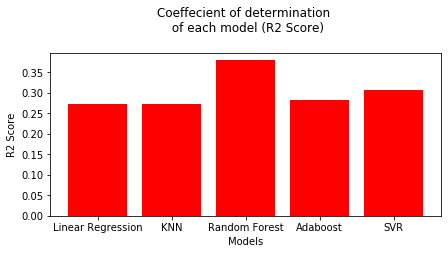

In [124]:
plt.bar(models_df['model_name'], models_df['R2 score'], color = 'red')
plt.title('Coeffecient of determination \n of each model (R2 Score)\n')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

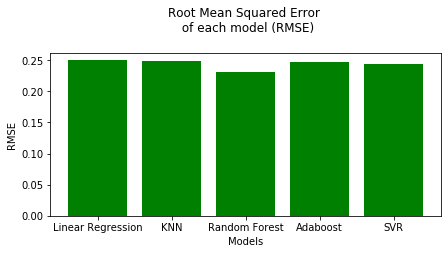

In [125]:
plt.bar(models_df['model_name'], models_df['RMSE'], color = 'green')
plt.title('Root Mean Squared Error \n of each model (RMSE)\n')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

### Model Deployment

In [126]:
predict_data_2 = predict_data

In [127]:
predict_data_2 = predict_data_2.drop(['active_bank_user', 'active_formal_nbfi_user', 'active_informal_nbfi_user', 'active_mm_user', 
                          'advanced_phone_use', 'avg_shock_strength_last_year', 'borrowed_for_daily_expenses_last_year',
                          'borrowed_for_emergency_last_year', 'borrowed_for_home_or_biz_last_year', 'borrowing_recency', 
                          'can_add', 'can_calc_compounding', 'can_calc_percents', 'can_call', 'can_divide', 'can_make_transaction', 
                          'can_text', 'can_use_internet', 'cash_property_savings', 'employed_last_year', 'employment_category_last_year',
                          'employment_type_last_year', 'female', 'financially_included', 'formal_savings', 'has_insurance', 
                          'income_ag_livestock_last_year', 'income_government_last_year', 'income_own_business_last_year',
                          'income_private_sector_last_year', 'income_public_sector_last_year', 'informal_savings', 'literacy',
                          'nonreg_active_mm_user', 'num_financial_activities_last_year', 'num_formal_institutions_last_year', 
                          'num_informal_institutions_last_year', 'num_times_borrowed_last_year', 'phone_technology', 
                          'reg_bank_acct', 'reg_formal_nbfi_account', 'relationship_to_hh_head', 'religion', 'row_id', 
                          'share_hh_income_provided', 'source'], axis=1)

In [128]:
predict_data_2 = predict_data_2.drop('poverty_probability', axis = 1)

In [129]:
predict_data_2.shape

(8059, 10)

In [130]:
const = 1

In [131]:
predict_data_2['const'] = 1

In [132]:
predict_data_2['poverty_probability'] = rf.predict(predict_data_2)

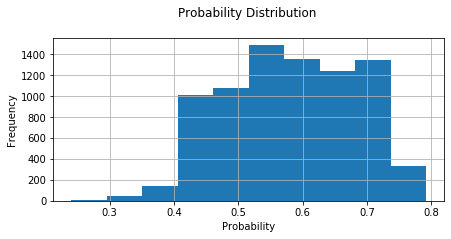

In [133]:
predict_data_2['poverty_probability'].hist()
plt.title('Probability Distribution \n')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()